## Global params

In [2]:
img_directory = '/home/ec2-user/img_align_celeba'
img_save_directory = '/home/ec2-user/autoencoder-vaegan/zach'
model_weights_path = '/home/ec2-user/model-weights.hdf5'
batch_size = 32
training_set_size = 256
img_size = 128

## Imports and helper functions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

## Load training data

In [4]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


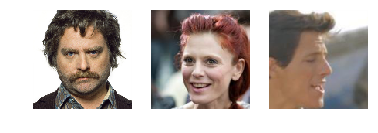

In [5]:
imshow([training[i] for i in range(3)])

## Create model and load weights

In [7]:
from model import Vaegan
model = Vaegan(img_shape=(img_size, img_size, 3), batch_size=batch_size)

In [8]:
y = model.model.predict(training[:batch_size], batch_size=batch_size)
print(y.shape)
y[0]

(32, 128, 128, 3)


array([[[ 0.50007528,  0.50001204,  0.50002176],
        [ 0.50008214,  0.50001651,  0.50001991],
        [ 0.4997502 ,  0.49992561,  0.49991393],
        ..., 
        [ 0.49977016,  0.50006932,  0.5001992 ],
        [ 0.4988417 ,  0.49969572,  0.50011575],
        [ 0.49948233,  0.49984121,  0.49946627]],

       [[ 0.50002801,  0.50003171,  0.49995792],
        [ 0.50001198,  0.50006998,  0.50010782],
        [ 0.49986175,  0.49980861,  0.50001299],
        ..., 
        [ 0.49951887,  0.50071716,  0.50025964],
        [ 0.49920306,  0.49968573,  0.49970406],
        [ 0.49996638,  0.49995458,  0.49998009]],

       [[ 0.49985632,  0.49986854,  0.50009412],
        [ 0.49996734,  0.49991405,  0.50000417],
        [ 0.50020748,  0.49998164,  0.50026387],
        ..., 
        [ 0.50020969,  0.49902019,  0.50100148],
        [ 0.50000763,  0.50064307,  0.49926028],
        [ 0.49987575,  0.49921203,  0.49970788]],

       ..., 
       [[ 0.50021631,  0.49961942,  0.50019723],
        

In [6]:
if (False):
    model.model.load_weights(model_weights_path)

## Zach and latest output of Zach

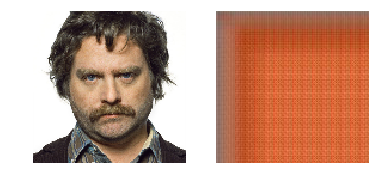

In [21]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[0], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

## Train

Reset image save filename counter

In [9]:
save_idx = 0

In [ ]:
start = save_idx
stop = save_idx + 1

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True)
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    save_idx = i
    
# model.model.save_weights(save_model)

In [19]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
predictions.shape
# predictions[0]
np.argwhere(np.isnan(predictions))
# predictions[0, 16, 26, 2]

array([], shape=(0, 4), dtype=int64)